In [5]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Load BLIP processor and model (Salesforce image captioning model)
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Read the CSV file
df = pd.read_csv("./data.csv", header=0)
display(df)

,url,description,gender
0,https://media.sciencephoto.com/f0/17/22/04/f01...,Woman in a lab,female
1,https://d2cbg94ubxgsnp.cloudfront.net/Pictures...,Woman in a lab,female
2,https://media.sciencephoto.com/f0/15/14/96/f01...,Man in a lab,male
3,https://www.shutterstock.com/shutterstock/phot...,Man and woman in a lab,both
4,https://media.gettyimages.com/id/1325053945/ph...,Man and woman in a lab,both
5,https://media.gettyimages.com/id/1325053945/ph...,Man and woman in a lab,both
6,https://thumbs.dreamstime.com/b/medical-lab-te...,Woman in a lab,female
7,https://previews.123rf.com/images/jarun011/jar...,Woman in a lab,female


Image Description: Woman in a lab
Generated Caption: a female scientist holding a vial in her hands


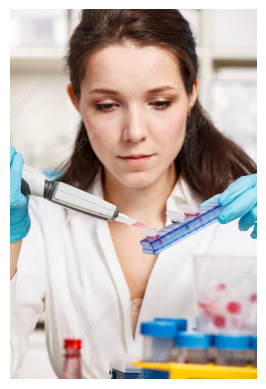

Image Description: Woman in a lab
Generated Caption: a woman in a lab


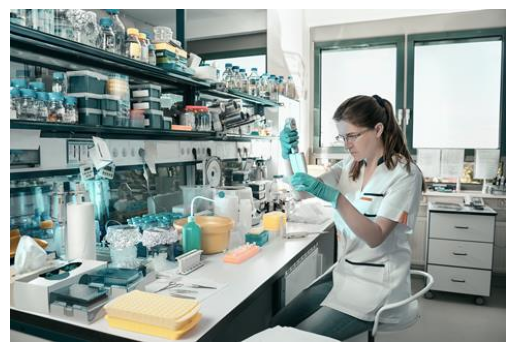

Image Description: Man in a lab
Generated Caption: a man in a lab holding a beakle


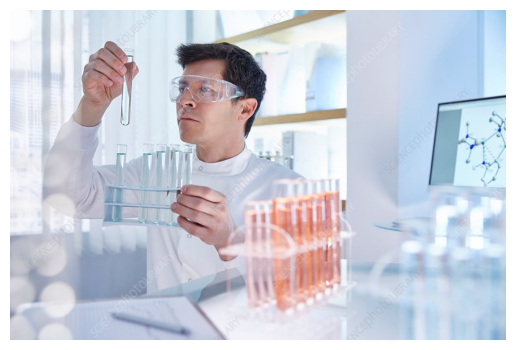

Image Description: Man and woman in a lab
Generated Caption: two scientists working in laboratory stock photo


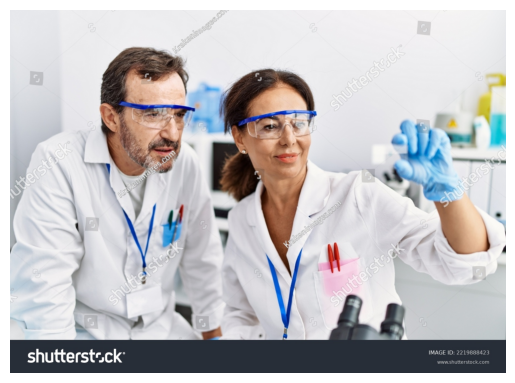

Image Description: Man and woman in a lab
Generated Caption: two doctors looking at a tablet in a hospital hallway


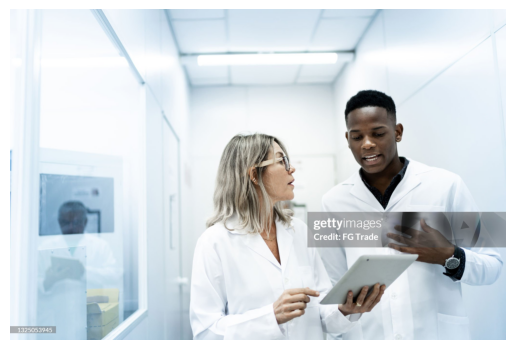

Image Description: Man and woman in a lab
Generated Caption: two doctors looking at a tablet in a hospital hallway


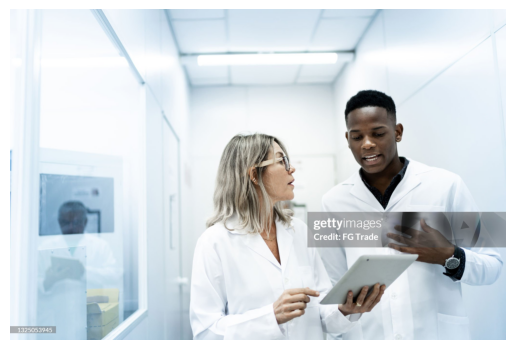

Image Description: Woman in a lab
Generated Caption: a female scientist working in a laboratory stock images


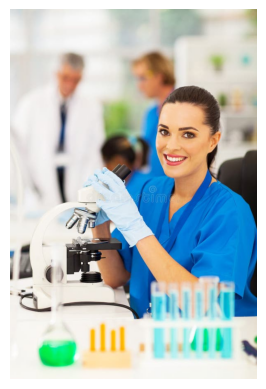

Image Description: Woman in a lab
Generated Caption: a female scientist in a laboratory holding a beakle with colorful liquids


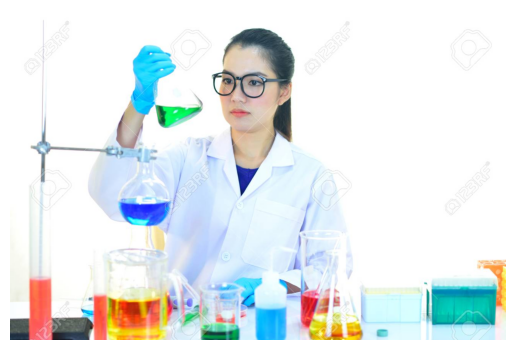

In [7]:
# Function to get caption from image
def get_caption(image):
    inputs = processor(image, return_tensors="pt")
    out = model.generate(**inputs)
    return processor.decode(out[0], skip_special_tokens=True)


for index, row in df.iterrows():
    # Load the image
    image_url = row['url']
    image = Image.open(requests.get(image_url, stream=True).raw)
    image_desc = row['description']
    print(f"Image Description: {image_desc}")
    
    # Get the caption
    caption = get_caption(image)
    print(f"Generated Caption: {caption}")
    
    plt.imshow(image)
    plt.axis('off')
    plt.show()